# TP 8 Distribution Gaussienne
Dans ce TP, nous aimerions explorer le classifieur base sur les distributions gaussiennnes pour une classification binaire.



# Importation des librairies necessaires au travail

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [4]:
# données
X = np.genfromtxt('X.csv', delimiter=',', dtype=float)
X.shape

(307, 2)

In [5]:
xval= np.genfromtxt('Xval.csv',delimiter=',',dtype=float)
xval.shape

(307, 2)

In [6]:
yval= np.genfromtxt('Yval.csv',delimiter=',',dtype=float)
yval.shape

(307,)

Dans ces données (data), les 2 premières colonnes representent les caracteristiques de l'ensemble d'entrainement.

Chaque ligne represente un exemple de notre ensemble de données. 


# Entrainement 
dans cette partie nous allons calculer les parametres de la disribution gaussienne de chaque caracteristique.

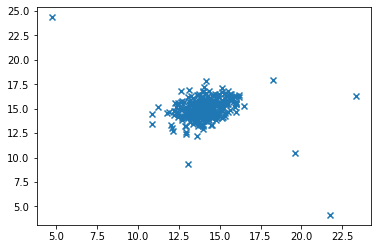

In [7]:
plt.scatter(X[:,0],X[:,1], marker ='x')

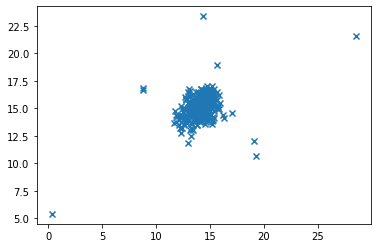

In [8]:
plt.scatter(xval[:,0],xval[:,1], marker ='x')

Mettons un lien avec ce que nous avons appris en regression linéaire

In [9]:
def moy(X):
    return np.mean(X,axis=0)#cad moyenne des col vu qu'on a 2 col dans X donc on retourne un tab de 2 moyenne
print(moy(X))
def var(X):
    return np.var(X,axis=0)# same as above on aura une val pour chaque col de X
print(var(X))

def calculParam(X):
    moy=np.mean(X,axis=0)
    var=np.var(X,axis=0)
    
    return moy,var

print(calculParam(X))

[14.11225277 14.99767459]
[1.8326777  1.70971534]
(array([14.11225277, 14.99767459]), array([1.8326777 , 1.70971534]))


In [10]:
moy=moy(X)
v=var(X) 
print(np.pi*v)
print(np.exp(0))

[5.7575268  5.37122915]
1.0


In [11]:
#prob est la fct de denciter si prob(x)<epsilon alors classe 1 sinon classe 2
def fctDensiter(X):
    p=1/np.sqrt(2*np.pi*v)
    e=np.exp(-((X-moy)*(X-moy)/2*v))
    prob=e*p
    return prob
prob= fctDensiter(X)
print(prob.shape)

(307, 2)


In [12]:
proba=fctDensiter(xval)
print(proba.shape)

(307, 2)


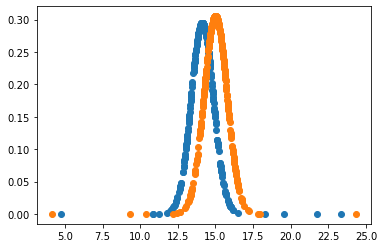

In [14]:
plt.scatter(X[:,0],prob[:,0])
plt.scatter(X[:,1],prob[:,1])

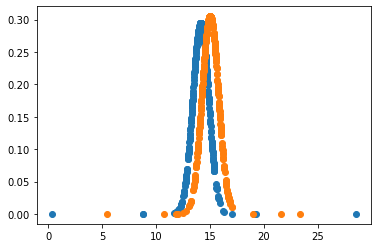

In [15]:
plt.scatter(xval[:,0],proba[:,0])
plt.scatter(xval[:,1],proba[:,1])

In [16]:
yprob=prob[:,0]*prob[:,1]

yprob=yprob.reshape(307,1)
yprob.shape

(307, 1)

In [17]:
Yproba=proba[:,0]*proba[:,1]
Yproba=Yproba.reshape(307,1)
Yproba.shape

(307, 1)

In [18]:
np.max(yprob)
yprob.shape

(307, 1)

In [20]:
from sklearn.metrics import f1_score
def fct(yproba,yval):
    f1_scores = []
    #plus on augement le saut de valeur plus la valeur du score est meilleur
    for epsilon in np.arange(0, 1, 0.000001):
        y_pred = np.ones(yproba.shape)
        y_pred[yproba >= epsilon] = 0
        f1_scores.append((f1_score(yval, y_pred),epsilon))
    return f1_scores
f=fct(Yproba,yval)

In [21]:
max(f)

(0.823529411764706, 6e-06)

C:\Users\User-hst\AppData\Local\Temp/ipykernel_18784/1894165124.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')  # Affichage en 3D


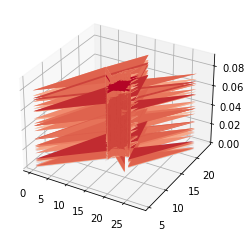

In [22]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  # Fonction pour la 3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
fig = plt.figure()
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.plot_surface(xval[:,0], xval[:,1], Yproba, cmap=cm.coolwarm, linewidth=0)  # Tracé d'une surface


# Travail à faire
- 1) Nous aimerions bien choisir le epsilon 




# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le Lundi 23 Mai 2022 à 22h


In [ ]:
# bonne chance